In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Section 22

In [5]:
img = cv2.imread('../DATA/00-puppy.jpg')

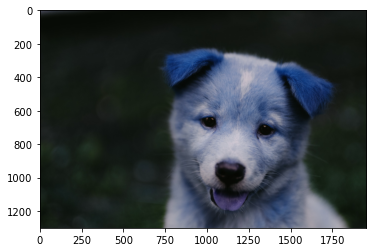

In [6]:
plt.imshow(img)

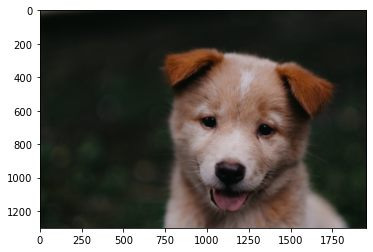

In [7]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

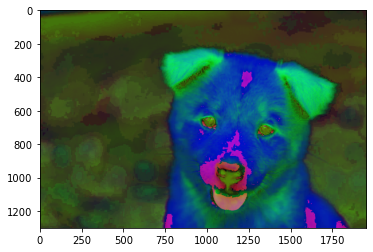

In [8]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img)

## Section 23

In [9]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

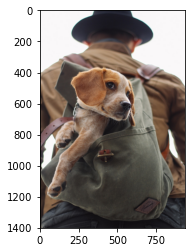

In [10]:
plt.imshow(img1)

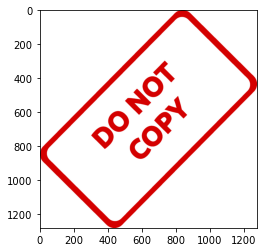

In [11]:
plt.imshow(img2)

In [12]:
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


Blending image of the same size

In [15]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

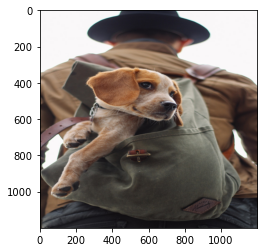

In [16]:
plt.imshow(img1)

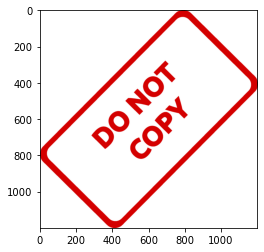

In [17]:
plt.imshow(img2)

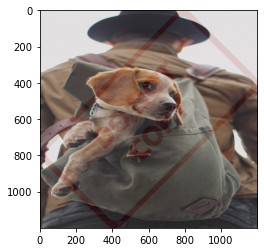

In [19]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1,gamma=0)
plt.imshow(blended)

Overlay small image on top of larger image (no blending)

In [26]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

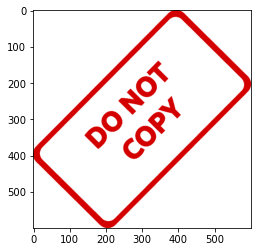

In [27]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

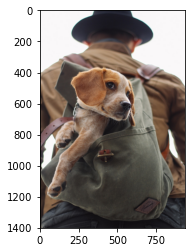

In [28]:
plt.imshow(img1)

In [29]:
img1.shape

(1401, 934, 3)

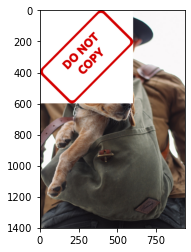

In [33]:
large_img = img1
small_img = img2
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img)

## Section 24

In [35]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

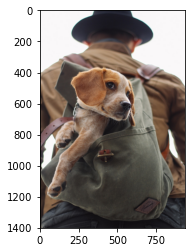

In [36]:
plt.imshow(img1)

In [37]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
print(x_offset, y_offset)

334 801


In [38]:
rows,cols,channels = img2.shape

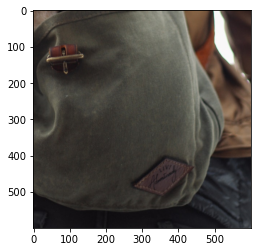

In [39]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
plt.imshow(roi)

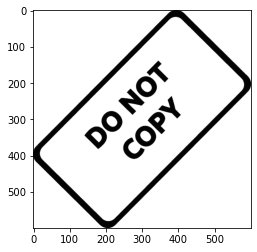

In [41]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

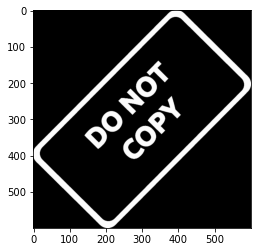

In [42]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [44]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [45]:
white_background.shape

(600, 600, 3)

In [58]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

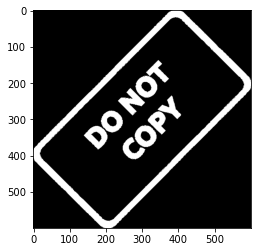

In [59]:
plt.imshow(bk)

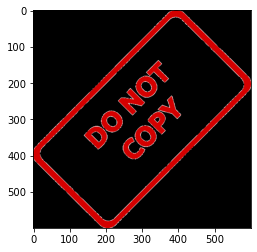

In [60]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

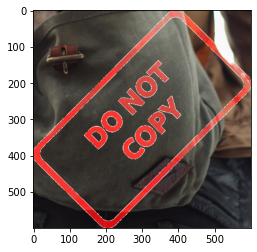

In [61]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

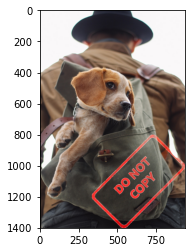

In [65]:
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)